<a href="https://colab.research.google.com/github/MaidinuerSaimi/Python-courses/blob/main/%E2%80%9C%E2%80%9CWorkshop_2_1_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 2.1  (Wrap up quiz M1)

**This quiz requires some programming to be answered.**

Open the dataset `ames_housing_no_missing.csv` with the following command:

In [ ]:
import pandas as pd

ames_housing = pd.read_csv("https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/ames_housing_no_missing.csv")

target_name = "SalePrice"
data, raw_target = ames_housing.drop(columns=target_name), ames_housing[target_name]
target = (raw_target > 200_000).astype(int)

In [ ]:
print(target.head())
print(data.head())

0    1
1    0
2    1
3    0
4    1
Name: SalePrice, dtype: int64
   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  Grvl      Reg   
1          20       RL         80.0     9600   Pave  Grvl      Reg   
2          60       RL         68.0    11250   Pave  Grvl      IR1   
3          70       RL         60.0     9550   Pave  Grvl      IR1   
4          60       RL         84.0    14260   Pave  Grvl      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub    Inside  ...           0        0     Gd  MnPrv   
1         Lvl    AllPub       FR2  ...           0        0     Gd  MnPrv   
2         Lvl    AllPub    Inside  ...           0        0     Gd  MnPrv   
3         Lvl    AllPub    Corner  ...           0        0     Gd  MnPrv   
4         Lvl    AllPub       FR2  ...           0        0     Gd  MnPrv   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  Sa

In [ ]:
print(ames_housing["SalePrice"].head())


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


`ames_housing` is a pandas dataframe. The column “SalePrice” contains the target variable.

We will treat this as a classification problem, instead of a regression one. Therefore, we convert the regression target into a classification target to predict whether or not an house is expensive. “Expensive” is defined as a sale price greater than $200,000.

(Note the underscore (`_`) in the value `200_000` -- this is just a visually helpful separator; Python interprets `200_000` simply as the integer `200000`.)

<div class="alert alert-info">

## Question 1

Use the data.info() and data.head() commands to examine the columns of the dataframe. Does the dataset contain only numerical, only categorical, or both numerical and categorical features?
</div>

In [ ]:
#c) both numerical and categorical features


<div class="alert alert-info">

## Question 2

How many features are available to predict whether or not a house is expensive?  (78, 79 or 80?)

In [ ]:
#a) 79 （80 in total and scale price is target）

In [ ]:
data.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

<div class="alert alert-info">

## Question 3
    
How many features are represented with numbers? (3, 33, 36, or 43?)

In [ ]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
len(numerical_features)


36

In [ ]:
# 36

Refer to the [dataset description](https://www.openml.org/d/42165) regarding the meaning of the dataset.

<div class="alert alert-info">

## Question 4

Among the following columns, which columns express a quantitative numerical value (excluding ordinal categories)?
***
1. “LotFrontage”
2. “LotArea”
3. “OverallQual”
4. “OverallCond”
5. “YearBuilt”

In [ ]:
#1 and 2

We consider the following numerical columns:

```python
numerical_features = [
  "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
  "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
  "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
  "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
  "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]
```

Now create a predictive model that uses these numerical columns as input data. Your predictive model should be a pipeline composed of a `sklearn.preprocessing.StandardScaler` to scale these numerical data and a `sklearn.linear_model.LogisticRegression`.  Then use `cross_validate` to assess how well the predictive model works.

In [ ]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [ ]:
numerical_features = [
  "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
  "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
  "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
  "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
  "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

In [ ]:
X = data[numerical_features]
y = target

In [ ]:
# ---- 建立 pipeline: StandardScaler + LogisticRegression ----
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)   # 多给点迭代避免 warning
)


In [ ]:
cv_results = cross_validate(
    model,
    X,
    y,
    cv=5,
    scoring="accuracy",
    return_train_score=True
)


In [ ]:
print("Train accuracy (per fold):", cv_results["train_score"])
print("Test  accuracy (per fold):", cv_results["test_score"])
print("Mean test accuracy:", cv_results["test_score"].mean())

Train accuracy (per fold): [0.90068493 0.9015411  0.89726027 0.90924658 0.91267123]
Test  accuracy (per fold): [0.89383562 0.9109589  0.89726027 0.87671233 0.89726027]
Mean test accuracy: 0.8952054794520548


<div class="alert alert-info">

## Question 5
    
What is the accuracy score obtained by 10-fold cross-validation (you can set the parameter cv=10 when calling cross_validate) of this pipeline?  Is it ~0.5, ~0.7 or ~0.9?

In [ ]:
# it is 0.9

In [ ]:
cv_results = cross_validate(
    model,
    X,
    y,
    cv=10,
    scoring="accuracy",
    return_train_score=True
)

print("Mean test accuracy:", cv_results["test_score"].mean())


Mean test accuracy: 0.8924657534246576


Instead of solely using the numerical columns, let us build a pipeline that can process both the numerical and categorical features together as follows:
***
* numerical features should be processed as previously done with a StandardScaler;
* the left-out columns should be treated as categorical variables using a `sklearn.preprocessing.OneHotEncoder`. To avoid any issue with rare categories that could only be present during the prediction, you can pass the parameter `handle_unknown="ignore"` to the `OneHotEncoder`.
* Use `make_column_selector` and `ColumnTransformer` from `sklearn.compose` to apply the two pre-processors to the right columns and concatenate the results.

In [ ]:
import pandas as pd

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

X = ames_housing.drop(columns=target_name)
y = (ames_housing[target_name] > 200_000).astype(int)

# 2. Automatic selectors
numerical_selector = make_column_selector(dtype_include=["int64", "float64"])
categorical_selector = make_column_selector(dtype_include=["object"])

# 3. Processors
numerical_processor = StandardScaler()
categorical_processor = OneHotEncoder(handle_unknown="ignore")

# 4. ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_processor, numerical_selector),
        ("cat", categorical_processor, categorical_selector),
    ]
)

# 5. Pipeline
model = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=1000)
)

# 6. Cross-validate
cv_results = cross_validate(
    model, X, y, cv=10, scoring="accuracy", return_train_score=False
)

print("Test accuracy per fold:", cv_results["test_score"])
print("Mean test accuracy:", cv_results["test_score"].mean())


Test accuracy per fold: [0.95205479 0.91780822 0.90410959 0.92465753 0.90410959 0.95890411
 0.89041096 0.91780822 0.95205479 0.9109589 ]
Mean test accuracy: 0.9232876712328768


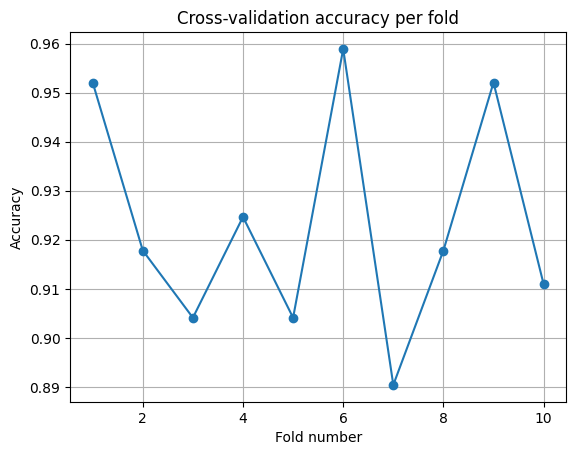

In [ ]:
import matplotlib.pyplot as plt

scores = cv_results["test_score"]

plt.plot(range(1, 11), scores, marker='o')
plt.xlabel("Fold number")
plt.ylabel("Accuracy")
plt.title("Cross-validation accuracy per fold")
plt.grid(True)
plt.show()


<div class="alert alert-info">

## Question 6
    
Build and assess the model with 10-fold cross validation.  Does it seem better than the numerical-only model?
    
One way to answer the previous question more quantitatively, is to report the mean and standard deviation of the 10 cross-validation accuracy scores.  Calculate these for both models using `numpy.mean()` and `numpy.std()`.
    
Also calculate the mean and standard deviation of the *difference* of the accuracy per-fold.  (Hint: `numpy` allows you to subtract two vectors.)  Do these results allow you to say that the full model is **significantly** better than the numerical-only model (at an alpha-level of 0.05)?